<a href="https://colab.research.google.com/github/PreciousAkpokighe/Churn-Prediction-Platform-Capstone-Design/blob/main/Required_assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required assignment 7.1: Applying predictive modelling techniques to real-world data

The goal of this assignment is to predict whether someone’s salary is above or below $50,000 a year based on a publicly available data set of census data. The original dataset can be found on UCI Repository: https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
#Import the packages
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt

### Read the file

In [3]:
# Source: https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
# taken and modified slightly from https://fairmlbook.org/code/adult.html

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] #feaures of the dataset

# This will download 3.8M
df_train = pd.read_csv("train_url.csv", names=features, sep=r'\s*,\s*', # Corrected path
                             engine='python', na_values="?") #read csv training
# This will download 1.9M
df_test = pd.read_csv("test_url.csv", names=features, sep=r'\s*,\s*', # Corrected path
                            engine='python', na_values="?", skiprows=1) #read csv test

num_train = len(df_train) #number of training instances

Replace the labels of the training and test sets so that "Target = 1" means high income and "Target = 0" means low income. The target column should be an integer (binary) column eventually.

In [4]:
#first list the training values possible
print("Unique values in training set target", df_train.Target.unique())
print("Unique values in test set target", df_test.Target.unique())

Unique values in training set target ['<=50K' '>50K' None]
Unique values in test set target ['<=50K.' '>50K.']


In [5]:
#now we can replace the labels
df_train.Target = df_train.Target.replace('<=50K', 0).replace('>50K', 1)
df_test.Target = df_test.Target.replace('<=50K.', 0).replace('>50K.', 1)


### Question 1:
The columns names and data type of columns are inspected. The missing values in each column for training and test sets are listed. Find the number of missing values in training and testing dataset. Answer the following.

The columns are first listed.

#### Q1.1: List how many missing values there are in each column for training and test sets.

- List how many missing values (cells) there are in each column for the training and test sets.
    
- Compute the total number of missing cells in the training dataset and assign it to `missing_train`.

- Compute the number of rows in the training dataset that contain at least one NaN and assign it to `missing_train_NaN`.

- Divide `missing_train` by `missing_train_NaN` and assign it to `result1`.

- Repeat the same steps for the test dataset and assign the ratio to `result2`.

HINT: For computing the `missing_train_NaN`ensure to compute the missing rows with atleast one `NaN`. This can be done by using `.any(axis=1)`.

To find the sum use `np.sum()`

In [6]:
#first list the columns
pd.set_option('max_colwidth', None)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18865 entries, 0 to 18864
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             18865 non-null  int64  
 1   Workclass       17810 non-null  object 
 2   fnlwgt          18865 non-null  int64  
 3   Education       18865 non-null  object 
 4   Education-Num   18865 non-null  int64  
 5   Martial Status  18865 non-null  object 
 6   Occupation      17807 non-null  object 
 7   Relationship    18865 non-null  object 
 8   Race            18865 non-null  object 
 9   Sex             18864 non-null  object 
 10  Capital Gain    18864 non-null  float64
 11  Capital Loss    18864 non-null  float64
 12  Hours per week  18864 non-null  float64
 13  Country         18530 non-null  object 
 14  Target          18864 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ MB


In [7]:
###GRADED CELL
missing_train = None
missing_train_NaN = None
result1 = None
missing_test = None
missing_test_NaN = None
result2 = None

###BEGIN SOLUTION
missing_train = np.sum(df_train.isna().sum())
missing_train_NaN = np.sum(df_train.isna().any(axis=1))
result1 = missing_train/missing_train_NaN
missing_test = np.sum(df_test.isna().sum())
missing_test_NaN = np.sum(df_test.isna().any(axis=1))
result2 = missing_test/missing_test_NaN
###END SOLUTION

print("Ratio for training data set  " , result1)
print("Ratio for testing data set ", result2)

Ratio for training data set   1.7814088598402325
Ratio for testing data set  1.8042588042588044


### Question 2:
The target variable is further investigated.

#### Q2.1: What fraction of Target is in the training and testing databases.

Assign the values to `training_target` and `testing_target` respectivily.

HINT: Use `.value_counts(normalize = True)`

In [8]:
### GRADED CELL
training_target = None
testing_target = None

###BEGIN SOLUTION
training_target = df_train["Target"].value_counts(normalize = True)
testing_target = df_test["Target"].value_counts(normalize = True)
###END SOLUTION

print("The target counts in the training set is given by ",training_target)
print("The target counts in the testing set is given by", testing_target)

The target counts in the training set is given by  Target
0    0.76145
1    0.23855
Name: proportion, dtype: float64
The target counts in the testing set is given by Target
0    0.763774
1    0.236226
Name: proportion, dtype: float64


If we classify everyone as a low-income instance, the accuracy, sensitivity, and specificity in the test set can be evaluated by considering the high-income class as the positive class, since our goal is to identify individuals who make more money.

In [9]:
accuracy = len(df_test[df_test['Target']==0])/len(df_test)

sensitivity = 0 #we never said "1" so we cannot classify any "1" correctly
specificity = 1 #we say "0" to all instances, so we cannot miss any 0's

#### Q2.2: List the fraction of high income instances within each group of "workclass" separately in the training set.

Assign the output to `workclass`.

HINT: Use .`groupby()`. Compute the `.mean()` of `['Target']` and sort it in ascending order using `.sort_values()`.

In [10]:
###GRADED CELL
#First group by workclasses, take target, average it, and then print it in an ascending way.
workclass = None

###BEGIN SOLUTION
workclass=df_train.groupby('Workclass', as_index=False)['Target'].mean().sort_values(by=['Target'], ascending=True)
###END SOLUTION

print(workclass)

          Workclass    Target
2      Never-worked       0.0
7       Without-pay       0.0
3           Private  0.216587
6         State-gov  0.270199
5  Self-emp-not-inc  0.283992
1         Local-gov  0.290939
0       Federal-gov  0.370826
4      Self-emp-inc  0.550769


#### Q2.3: Building on the previous question, apply the following simple classification rule to the test set: classify an instance as "1" (high income) if its workclass belongs to one of the two highest-earning groups.

Using the confusion matrix, calculate and report the accuracy and sensitivity of this model.

Compute accuracy and assign it `accuracy`. Accuracy can also be computed as a fraction of correct to total values.
Compute sensitivity and assign it `sensitivity`.

HINT: Sensitivity = $$ \frac{TP}{TP + FN} $$

In [11]:
greedy_workclass = df_test.apply(lambda row: 1 if (row["Workclass"] == "Self-emp-inc") or\
                                 (row["Workclass"] == "Federal-gov") else 0, axis = 1) #apply the function to predict
y_true = df_test.Target.astype(int).values
y_pred = greedy_workclass.astype(int).values

In [12]:
#import sklearn's confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [13]:
###GRADED CELL
total = len(y_true)
correct = cm[0][0] + cm[1][1]
accuracy = None
sensitivity = None

###BEGIN SOLUTION
accuracy = correct/total
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
###END SOLUTION

print("The accuracy is given by ", accuracy)
print("The sensitivity is given by ", sensitivity)

The accuracy is given by  0.7613782937166022
The sensitivity is given by  0.1315652626105044


### Question 3: Performing further statistics and outlier detection

#### Q3.1: List the fraction of male and females within US citizens in the training set.

Assign to answer to `US_Gender`.

HINT: Use country = "United-States" and compute the `.value_counts(normalize = True)` on "Sex" attribute.

In [14]:
###GRADED CELL

US_Gender = None

###BEGIN SOLUTION
US_Gender = df_train[df_train["Country"]=="United-States"]["Sex"].value_counts(normalize = True)
###END SOLUTION

print("The gender distribution is given by ",US_Gender)

The gender distribution is given by  Sex
Male      0.670556
Female    0.329444
Name: proportion, dtype: float64


#### Q3.2: What is the most common occupation (training set)?

Assign the answer to `occupation`. Use `.idxmax()` to get the most common occupation

In [15]:
###GRADED CELL
occupation = None

###BEGIN SOLUTION
occupation = df_train['Occupation'].value_counts().idxmax()
###END SOLUTION

print(occupation)

Prof-specialty


#### Q3.3: Which occupations are the most common male and female instances, respectively (training set)?

Assign your answers to `occupation_male` and `occupation_female`.

In [16]:
###GRADED CELL
occupation_male = None
occupation_female = None

###BEGIN SOLUTION
occupation_male = df_train[df_train["Sex"]=="Male"]['Occupation'].value_counts().idxmax()
occupation_female = df_train[df_train["Sex"]=="Female"]['Occupation'].value_counts().idxmax()
###END SOLUTION

print("The most common male occupation is ", occupation_male)
print("The most common female occupation is", occupation_female)

The most common male occupation is  Craft-repair
The most common female occupation is Adm-clerical


Plotting the histogram of the "Age" column using the training set data, setting it to 10 bins and reflecting the percentage of instances on the Y-axis, allows for visually assessing potential outliers, indicating whether they are more prevalent at the higher or lower end of the age range.

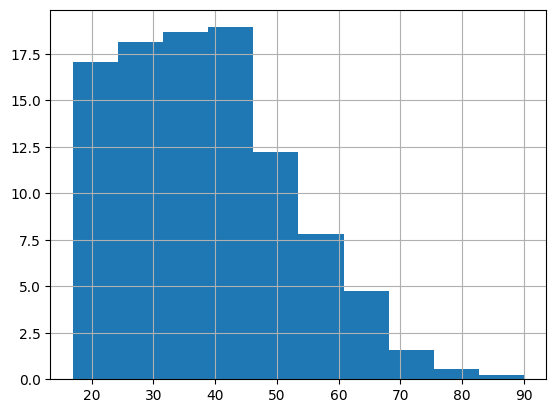

In [17]:
df_train["Age"].hist(bins=10, weights=np.ones_like(df_train["Age"]) * 100. / len(df_train)).plot()
plt.show()
plt.close()

The age on the $99$-th quantile is 74. So it is not an 'erronous' outlier

In [18]:
df_train["Age"].quantile(0.99) #the ".quantile" function of pandas datframe will be enough

np.float64(74.0)

The correlation analysis in the training set shows that among the numerical predictors, "Education-Num" and "Age" have the strongest positive correlations with the target variable. The correlation of "Age" with the target indicates a moderate positive relationship, suggesting that as age increases, the likelihood of belonging to the positive class (high income) tends to increase.

In [19]:
print(df_train.columns)


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')


In [20]:
df_train.columns = df_train.columns.str.strip()

if "Target" in df_train.columns:
    target = df_train["Target"]
    df_train_num = df_train.select_dtypes(include=['number'])
    correlations = df_train_num.corrwith(target, method='pearson')
    print(correlations)
else:
    print("The 'Target' column does not exist in df_train.")


Age               0.228518
fnlwgt           -0.010656
Education-Num     0.329325
Capital Gain      0.220598
Capital Loss      0.152569
Hours per week    0.224402
dtype: float64


In [21]:
target = df_train["Target"]
df_train_num = df_train.select_dtypes(include=['number'])
correlations = df_train_num.corrwith(target, method='pearson')

### Question 4:Applying Linear Regression model for Classification


Linear Regression, as the name suggests, is a regression method but we would like to apply classification. For that the `NaN` values are first removed. A copy of `df_train()` is made and `.dropna()` is used to drop `NaN` values.

In [22]:
df_save = df_train.copy()

In [23]:
df_train = df_train.dropna(how='any')

#### Q4.1: Train a linear regression model on the training set.

This has two steps. In Step 1, the numeric columns are picked and stored in an array `numericals`. In the Step 2, `LinearRegression()`is fit using `.fit(X,y)`.(3 marks)

HINT: The input `X` and the output `y` are picked from `df_train` numerical inputs and Target.
The model is assigned to `clf`.

In [24]:
#Step 1 -- take the numeric columns
numericals = [] #start with an empty array
for i in range(len(df_train.dtypes)): #for all columns
    coltype = df_train.dtypes.iloc[i] #take the type of column
    if coltype != 'object' and df_train.columns[i] != 'Target': #object types are the categorical variables
        numericals.append(df_train.columns[i])

In [25]:
###GRADED CELL
#Step 2 -- fit
from sklearn.linear_model import LinearRegression
X = None
y = None
clf = None

###BEGIN SOLUTION
X = df_train[numericals] #training predictors
y = df_train.Target #training target
clf = LinearRegression().fit(X, y) #time to fit
###END SOLUTION

#### Q4.2: Apply the linear model that we just fit and predict the training target. Show the first 5 predictions

Use `.predict(X)` and assign the result to `scores_linear_training`

In [26]:
##GRADED CELL

scores_linear_training = None

###BEGIN SOLUTION
scores_linear_training = clf.predict(X) #predict
###END SOLUTION
print(scores_linear_training[:5])

[0.36569641 0.27310934 0.16738898 0.17222566 0.30155125]


To perform classification on the training set, apply a cutoff value of 0.4 such that any predicted output greater than this threshold is classified as "1" (positive class), and otherwise as "0" (negative class). Then, manually compute the accuracy, sensitivity, and specificity using the confusion matrix components without relying on built-in functions. Finally, analyze and discuss the model’s performance based on these metrics.

In [27]:
cutoff = 0.4 #cutoff value
predicted_linear_training = (scores_linear_training >= cutoff) #take the scores, and apply the logical

In [28]:
predicted_linear_training[:9] #here are some of the classifications

array([False, False, False, False, False, False, False, False,  True])

In [29]:
def metrics(cm): #this function returns relevant statistics
    total = cm[0][0] + cm[1][1] +  cm[0][1] +  cm[1][0]
    correct = cm[0][0] + cm[1][1]
    accuracy = correct/total
    specificity = cm[0][0] / (cm[0][0] + cm[0][1])
    sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
    return total, correct,accuracy,specificity,sensitivity

In [30]:
y_true = df_train.Target.astype(int).values          # ensure integer
y_pred = predicted_linear_training.astype(int)       # convert boolean to integer
print(y_true)
print(y_pred)
cm = confusion_matrix(y_true, y_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [31]:
total_train, correct_train,accuracy_train,specificity_train,sensitivity_train \
= metrics(confusion_matrix(y_true, y_pred)) #get all the metrics

In [32]:
print("Accuracy:", round(accuracy_train,3), "\nSensitivity:", round(sensitivity_train,3),\
      "\nSpecificity:", round(specificity_train,3))

Accuracy: 0.795 
Sensitivity: 0.464 
Specificity: 0.903


Observation:-
- Accuracy is 79.6%, which is better than the 75% accuracy we can obtain if we say "0" to all.
- Sensitivity is 47.9%, which is better than the 24% sensitivity we can obtain if we say "1" to all.
- Both metrics improve the greedy method we applied.

#### Q4.3: Apply the same on training set but decrease the cutoff down to 0.2. Inspect the metrics we looked before, and compare the results with the cutoff 0.4. Interpret the results.

Use the `metrics()` defined above. The Accuracy, Sensitivity, Specificity are computed storing in `_,_,accuracy_train_alt,specificity_train_alt,sensitivity_train_alt`.

In [33]:
###GRADED CELL
_, _,accuracy_train_alt,specificity_train_alt,sensitivity_train_alt= None, None, None, None, None
cutoff_altenative = 0.2 #cutoff value
predicted_linear_training_alternative = (scores_linear_training >= cutoff_altenative)

###BEGIN SOLUTION
_, _,accuracy_train_alt,specificity_train_alt,sensitivity_train_alt \
= metrics(confusion_matrix(y_true, predicted_linear_training_alternative.astype(int))) #get all the metrics
###END SOLUTION

In [34]:
print("Accuracy:", round(accuracy_train_alt,3), "\nSensitivity:", round(sensitivity_train_alt,3),\
      "\nSpecificity:", round(specificity_train_alt,3))

Accuracy: 0.616 
Sensitivity: 0.885 
Specificity: 0.528


Observation:-
- We have much better sensitivity at a cost of worse specificity. In return, overall accuracy gets worse.

Applying the linear model to the test set with a cutoff value of 0.4, the accuracy, sensitivity, and specificity are computed based on the resulting classifications using the confusion matrix.

In [35]:
X_test = df_test[numericals] #extract predictors
y_test = df_test.Target #same for test target
cutoff_test = 0.4
scores_linear_test = clf.predict(X_test)
predicted_linear_test = (scores_linear_test >= cutoff_test)

In [36]:
_, _,accuracy_test,specificity_test,sensitivity_test \
= metrics(confusion_matrix(y_true, y_pred)) #get all the metrics

In [37]:
print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3))

Accuracy: 0.795 
Sensitivity: 0.464 
Specificity: 0.903


In the previous question we tuned the cutoff value on the training set. This initialy makes sense, because we cannot tune on the test-set, which will be indirectly training on the test set. However, we also discussed in the validation-set approach that it is not a good practice to *compare* models on the training set, because of a natural bias in this procedure. Hence, it is a better approach to tune a value on a validation set. For this purpose, apply the following steps:

- Split the training set as 80% (training) - 20% (validation) sets. You can take the first 80% and last 20% and no need to randomize the selection.
- Train a linear model on the training set obtained in the previous approach. Training one model is enough.
- Compare cutoff values between 0.2 - 0.8 with 0.05 increments. Pick the best model by looking at the validation set, where the "best" model has an accuracy over 76% and has the highest sensitivity still.
- Test the validated cutoff on the test set and return the metrics.
- [Extra / optional] Instead of the hold-out validation that you just applied, try 5-fold cross validation in the original training set.

In [38]:
# Step 1 -- split
training_nr = round(len(X)*0.8)
train_80 = X[:training_nr]
y_train_80 = df_train[:training_nr].Target #training target
validate_20 = X[training_nr:]
y_validate_20 = df_train[training_nr:].Target #training target

In [39]:
# Step 2 -- train
clf = LinearRegression().fit(train_80, y_train_80) #time to fit

In [40]:
# Step 3 -- try cutoffs
scores_linear_validation = clf.predict(validate_20) #predict
cutoffs = np.arange(0.2,0.85, 0.05)
max_cutoff = 0
max_sensitivity = 0
max_accuracy = 0  # Initialize max_accuracy
for cutoff in cutoffs:
    predicted_linear_validated = pd.Series(scores_linear_validation >= cutoff, index=validate_20.index)
    # Convert y_validate_20 to integer and drop rows with NaN
    y_validate_20_cleaned = y_validate_20.dropna().astype(int)
    predicted_linear_validated_cleaned = predicted_linear_validated[y_validate_20_cleaned.index].astype(int) # Align predictions with cleaned target
    _, _,accuracy_validate,specificity_validate, sensitivity_validate \
        = metrics(confusion_matrix(y_validate_20_cleaned, predicted_linear_validated_cleaned)) #get all the metrics
    if accuracy_validate >= 0.76 and sensitivity_validate >= max_sensitivity:
        max_cutoff = cutoff
        max_sensitivity = sensitivity_validate
        max_accuracy = accuracy_validate # Update max_accuracy

In [41]:
print("The best cutoff value is", max_cutoff, "with a validation accuracy of", round(max_accuracy,3), \
      "and a validation sensitivity of", round(max_sensitivity,3))

The best cutoff value is 0.3 with a validation accuracy of 0.77 and a validation sensitivity of 0.722


In [42]:
# step 4 -- test this
scores_validated_test = clf.predict(X_test)
predicted_validated_test = (scores_validated_test >= max_cutoff)
# Convert df_test.Target to integer and drop rows with NaN
df_test_cleaned = df_test.dropna(subset=['Target']).copy()
y_test_cleaned = df_test_cleaned.Target.astype(int).values
predicted_validated_test_cleaned = predicted_validated_test[df_test_cleaned.index].astype(int) # Align predictions with cleaned target

_, _,accuracy_test,specificity_test,sensitivity_test \
    = metrics(confusion_matrix(y_test_cleaned, predicted_validated_test_cleaned)) #get all the metrics
print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3)) #we are done!

Accuracy: 0.745 
Sensitivity: 0.689 
Specificity: 0.763


### Final notes
Linear regression is not inherently suited for classification tasks, but it can perform reasonably well in some cases. Logistic regression, a related method, models a linear relationship like linear regression but applies a nonlinear transformation to produce outputs between 0 and 1. This allows straightforward classification by assigning instances with predicted values ≥ 0.5 to class "1," with the threshold adjustable as needed.

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y.dropna().astype(int))

In [44]:
scores_linear_training = clf.predict(X)

In [45]:
#Clean the target column and align with predictions
y_true_cleaned = df_train.Target.dropna().astype(int)
# Get the index of the cleaned target values
cleaned_index = y_true_cleaned.index
# Select the predicted values corresponding to the cleaned target values using their positional index
y_pred_aligned = scores_linear_training[df_train.Target.dropna().index.map(df_train.Target.index.get_loc).values]

total_train, correct_train,accuracy_train,specificity_train,sensitivity_train \
= metrics(confusion_matrix(y_true_cleaned, y_pred_aligned))

#### Applying Logistic Regression model to the test set

Now we will apply the trained Logistic Regression model to the test set and evaluate its performance using accuracy, sensitivity, and specificity.

In [46]:
X_test_cleaned = X_test.dropna() # Drop rows with NaN in test predictors for consistency
# Align the test target with the cleaned test predictors
y_test_cleaned_aligned = df_test.loc[X_test_cleaned.index, 'Target'].dropna().astype(int)

# Predict on the cleaned test data
scores_logistic_test = clf.predict(X_test_cleaned)

# Convert scores to a pandas Series with the same index as the cleaned predictors
predicted_logistic_test_series = pd.Series(scores_logistic_test, index=X_test_cleaned.index)

# Align the predicted values with the cleaned test target
predicted_logistic_test_aligned = predicted_logistic_test_series.loc[y_test_cleaned_aligned.index]

# Calculate metrics
_, _, accuracy_logistic_test, specificity_logistic_test, sensitivity_logistic_test \
    = metrics(confusion_matrix(y_test_cleaned_aligned, predicted_logistic_test_aligned))

print("Logistic Regression Metrics on Test Set:")
print("Accuracy:", round(accuracy_logistic_test, 3))
print("Sensitivity:", round(sensitivity_logistic_test, 3))
print("Specificity:", round(specificity_logistic_test, 3))

Logistic Regression Metrics on Test Set:
Accuracy: 0.813
Sensitivity: 0.387
Specificity: 0.945
